In [1]:
import networkx as nx
import sqlite3

In [2]:
conn = sqlite3.connect('Task_base.db')
c = conn.cursor()

In [3]:
c.execute('''SELECT * from newsworthiness_final''')
adjmatrix = [item for item in c.fetchall()]

In [44]:
conn.commit()
conn.close()

In [6]:
print(adjmatrix[0])

('-76982440_1663370', -76982440, 'Meduza', None, None, '1', None, None, None, None, None, None, None, '1', None, '17.01.2018 13:28', 556, 68707, 63, 33, 57, '9,009271253', '8,921943907', '1,397237545', '1,309910198')


In [28]:
val_names = ['Follow_up', 'The_power_elite', 'Entertainment', 'Drama', 'Conflict', 'Surpise', 'Celebrity', 'Magnitude', 'Bad_news', 'Exclusivity', 'Audio_visuals', 'Good_news']

In [29]:
len(val_names)

12

In [53]:
edge_list = []
k=0
g = nx.Graph()

In [54]:
print(len(adjmatrix), len(adjmatrix[0]))

800 25


In [55]:
print(adjmatrix[0], end='')

('-76982440_1663370', -76982440, 'Meduza', None, None, '1', None, None, None, None, None, None, None, '1', None, '17.01.2018 13:28', 556, 68707, 63, 33, 57, '9,009271253', '8,921943907', '1,397237545', '1,309910198')

In [56]:
for i in range(len(adjmatrix)):
    for j in range(3, 15):
        if adjmatrix[i][j] == '1':
            edge_list.append((adjmatrix[i][0],val_names[j-3]))
            g.nodes[adjmatrix[i][j]]['val_name'] = val_names[j-3]

In [57]:
edge_list[0]

('-76982440_1663370', 'Entertainment')

In [58]:
g.add_edges_from(edge_list)

In [59]:
#names = [adjmatrix[i][2] for i in range(len(adjmatrix))]

In [61]:
for i in range(len(edge_list)): 
    g.add_node(edge_list[i][0])
    g.add_node(edge_list[i][1])

In [69]:
#print(list(g.nodes()))

In [47]:
for k in range(len(adjmatrix)):
    g.nodes[adjmatrix[k][0]]['name'] = adjmatrix[k][2]
    g.nodes[adjmatrix[k][0]]['views'] = adjmatrix[k][17]
    g.nodes[adjmatrix[k][0]]['er'] = adjmatrix[k][21]

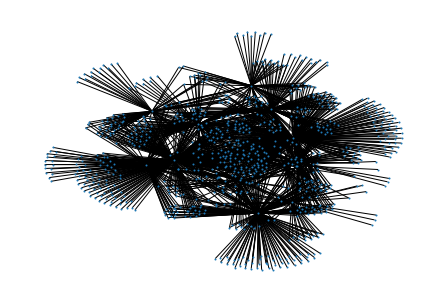

In [70]:
nx.draw(g, node_size = 1)

In [51]:
nx.write_graphml_lxml(g, "news.graphml", encoding='utf-8')